<a href="https://colab.research.google.com/github/ErmachenkoBoris/three-dimensional-computer-vision/blob/master/lab1_Ermachenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# импортируем нужные пакеты
import numpy as np
import cv2
from urllib.request import urlopen


In [5]:
import matplotlib.pyplot as plt


In [4]:
url = "https://sites.google.com/site/cvnnsu/materialy-lekcij/whiteballssample.jpg"
# загружаем изображение, меняем цвет на оттенки серого и уменьшаем резкость
resp = urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, -1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
cv2.imwrite("gray.jpg", gray)

True

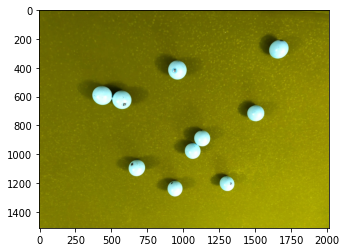

In [6]:
plt.imshow(image)

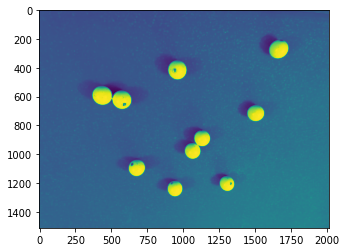

In [7]:
plt.imshow(gray)

1. Бинаризуем изображение.
Попробуем, подойдут ли нам адаптивные функции бинаризации:

In [11]:
image_bin = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,1)

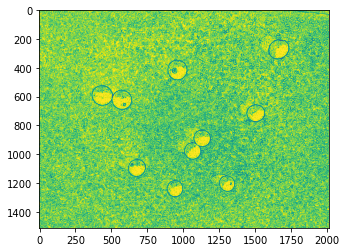

In [12]:
plt.imshow(image_bin)

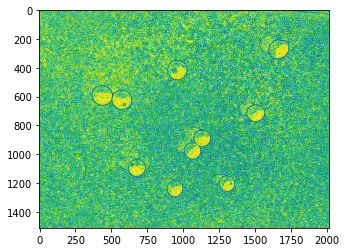

In [14]:
image_bin = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C ,cv2.THRESH_BINARY,5,1)
plt.imshow(image_bin)

Используем обычные:

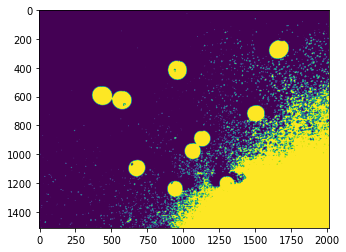

In [22]:
ret,img1 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
plt.imshow(img1)

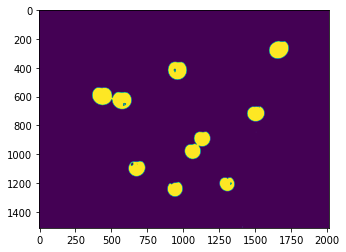

In [24]:
ret,img1 = cv2.threshold(gray,160,255,cv2.THRESH_BINARY)
plt.imshow(img1)

2. Применяем морфологическую операцию, чтобы разъединить шары

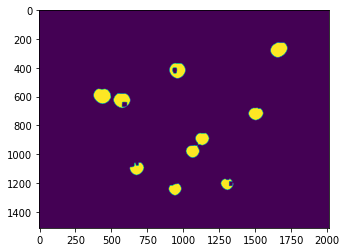

In [28]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img1,kernel,iterations = 4)
plt.imshow(erosion)

3. Ищем контуры и количество шаров:

In [29]:
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("count of balls:", len(contours))

count of balls: 10


4. Ищем средний радиус и дисперсию


In [34]:
radiuses = []

for circle in contours:
    (centr, r) = cv2.minEnclosingCircle(circle)
    radiuses.append(r)
meanRadius = np.mean(radiuses)
variance = np.var(radiuses)


In [35]:
print("Mean radius: ", meanRadius)
print("Variance: ", variance)

Mean radius:  51.154516983032224
Variance:  39.16881455080598
